# Дипломная работа по курсу "Python для анализа данных"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Ольга\\Downloads\\HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###### Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


###### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. 

In [6]:
df[['number_project', 'average_montly_hours']].corr(method='spearman')

,number_project,average_montly_hours
number_project,1.000000,0.397855
average_montly_hours,0.397855,1.000000


In [7]:
df[['last_evaluation', 'number_project']].corr(method='spearman')

,last_evaluation,number_project
last_evaluation,1.000000,0.350399
number_project,0.350399,1.000000


In [8]:
df[['last_evaluation', 'left']].corr(method='spearman')

,last_evaluation,left
last_evaluation,1.00000,-0.00244
left,-0.00244,1.00000


In [12]:
df[['number_project', 'Work_accident']].corr(method='spearman')

,number_project,Work_accident
number_project,1.000000,0.002328
Work_accident,0.002328,1.000000


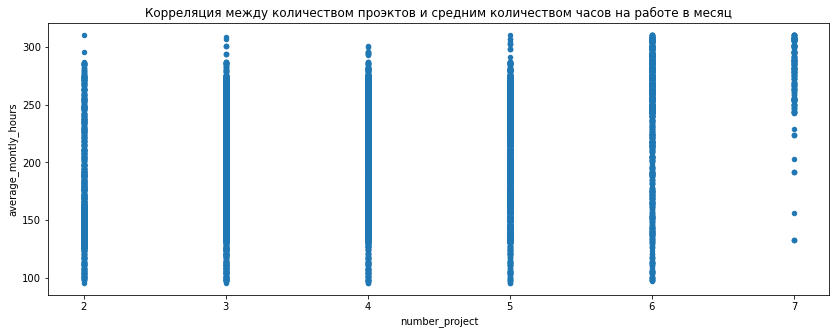

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,5
df.plot(kind='scatter', 
        x='number_project', 
        y='average_montly_hours', 
        title='Корреляция между количеством проэктов и средним количеством часов на работе в месяц')

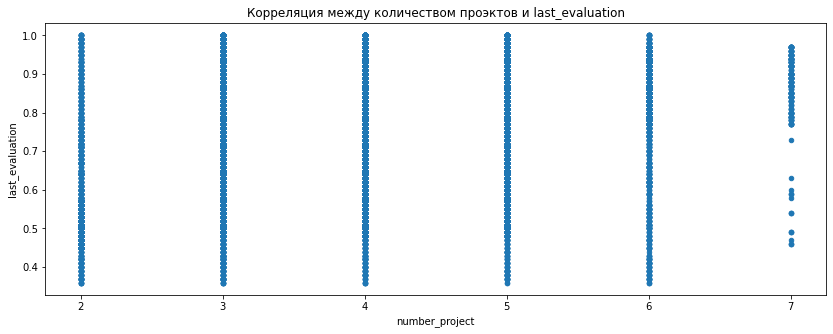

In [16]:
df.plot(kind='scatter', 
        x='number_project', 
        y='last_evaluation', 
        title='Корреляция между количеством проэктов и last_evaluation')

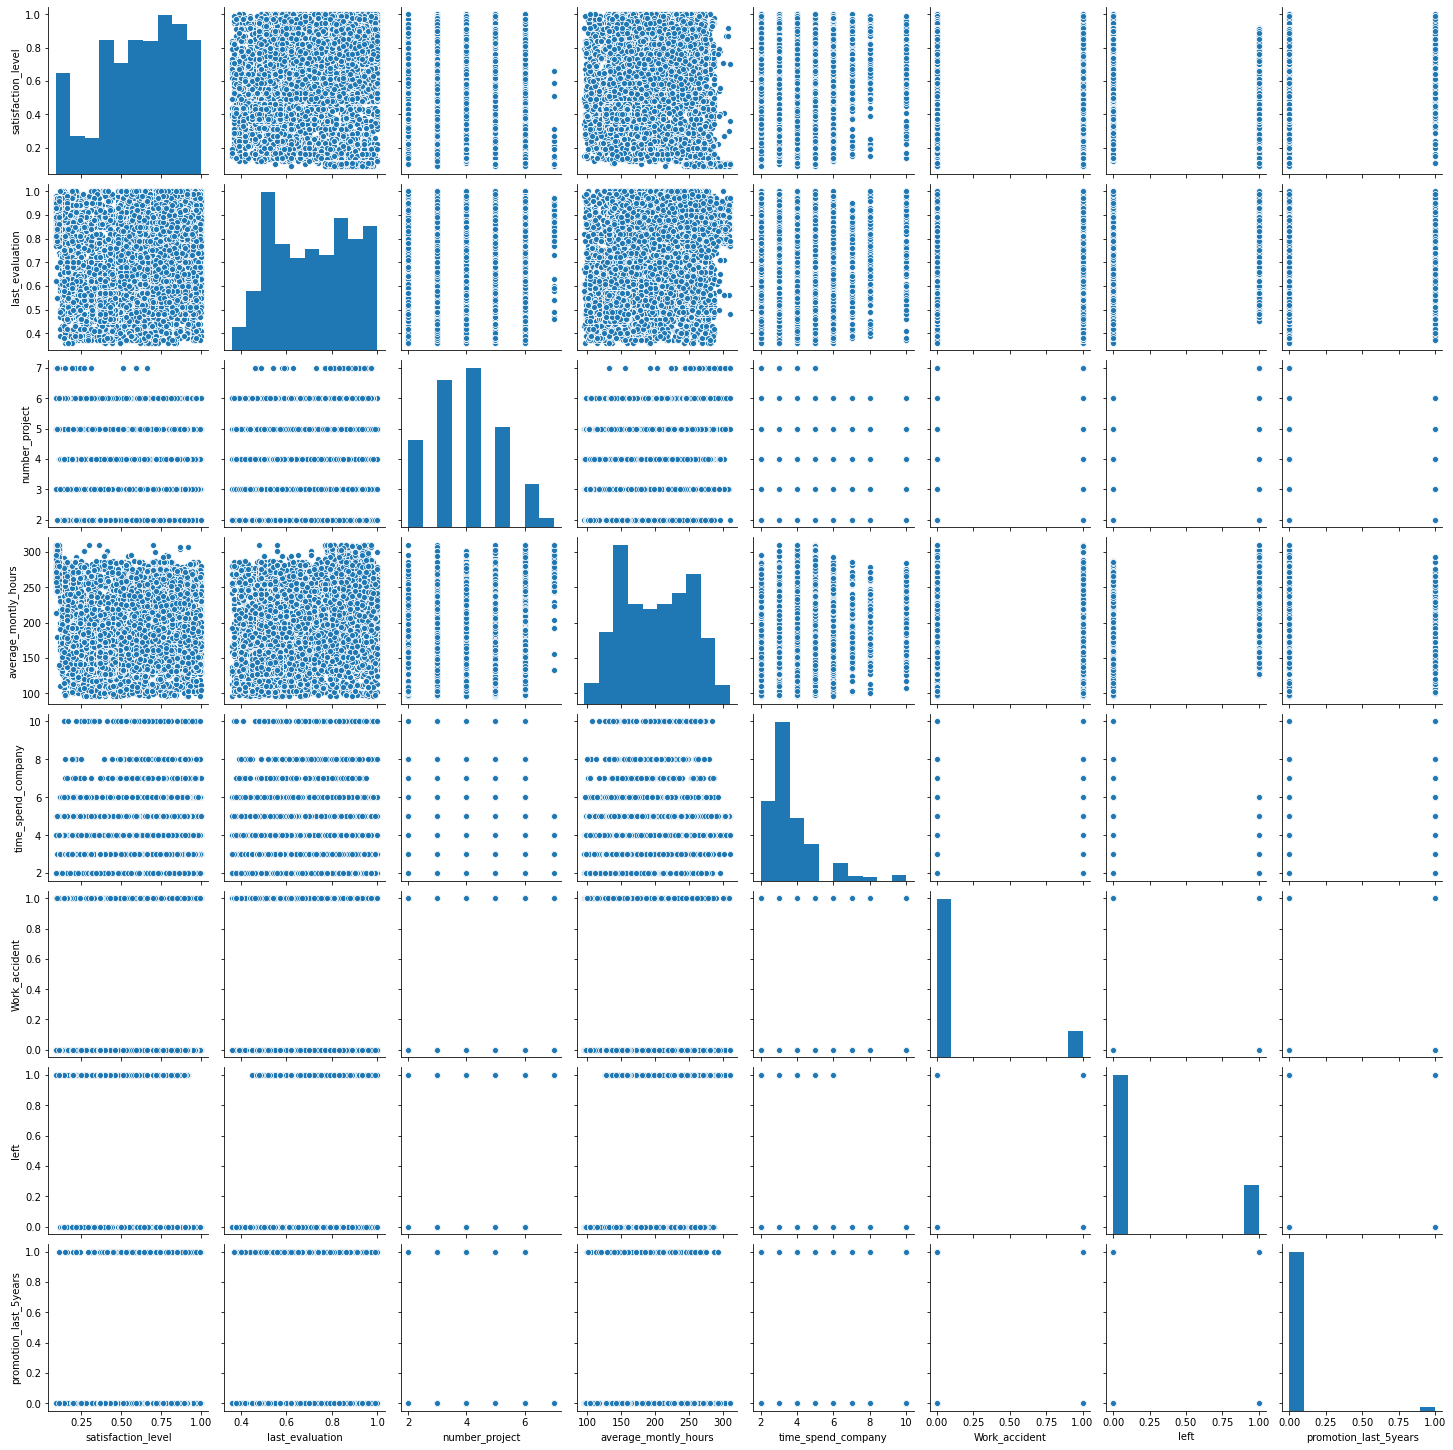

In [17]:
sns.pairplot(df)

###### Рассчитайте сколько сотрудников работает в каждом департаменте. 

In [18]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

###### Показать распределение сотрудников по зарплатам. 

In [19]:
salary  = df.groupby('salary')['salary'].count()
salary

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x1ce48b3e4c0>,
 Text(0.5, 1.0, 'Распределение сотрудников по зарплатам'))

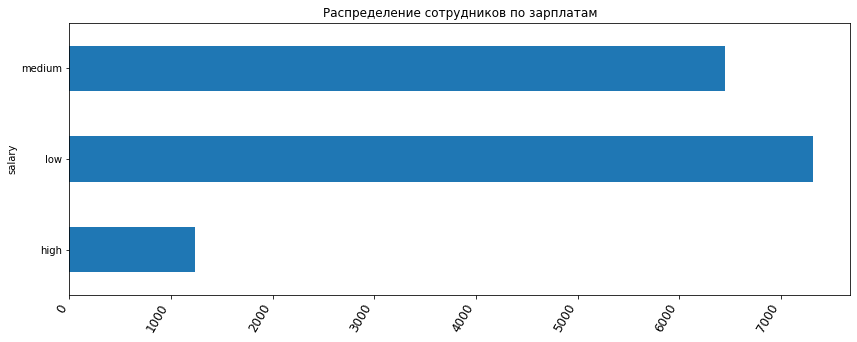

In [20]:
import matplotlib.pyplot as plt
ax = salary.plot(kind='barh', stacked=True),plt.title('Распределение сотрудников по зарплатам')
plt.xticks(rotation=60, horizontalalignment='right',fontsize=12)
ax

###### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 

In [21]:
salary_department  = df.groupby(['department','salary'])['salary'].count()
salary_department

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x1ce49c73ac0>,
 Text(0.5, 0, 'Salary'),
 Text(0.5, 1.0, 'Распределение сотрудников по зарплатам в каждом департаменте'))

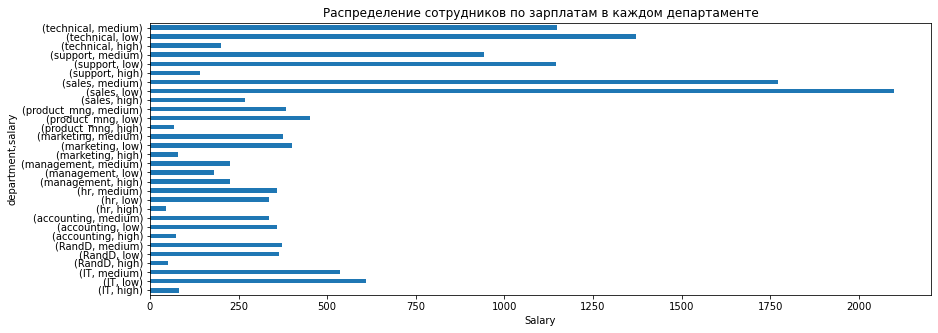

In [22]:
s_d = df[['department','salary']].groupby(by='department').count().sort_values(by='salary', ascending=False).head(10)
ax = salary_department.plot(kind='barh'),plt.xlabel('Salary'),plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
ax

###### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени,чем сотрудники с низким окладом 

In [23]:
df_gipoteza = df[['average_montly_hours', 'salary']]
dfg  = df_gipoteza.groupby('salary')['average_montly_hours'].mean()
dfg

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

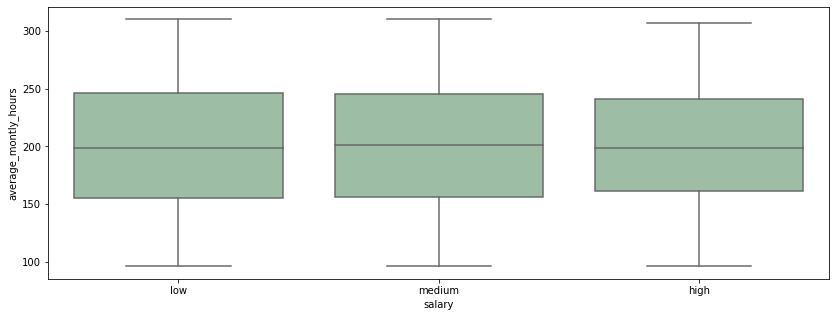

In [24]:
import seaborn as sns  
ax = sns.boxplot(x='salary',y='average_montly_hours',data=df_gipoteza, color='#99c2a2')
plt.show()

In [25]:
high = df_gipoteza.loc[df_gipoteza['salary'] =='high']
low = df_gipoteza.loc[df_gipoteza['salary'] =='low']
medium  = df_gipoteza.loc[df_gipoteza['salary'] =='medium']
from scipy.stats import f_oneway
F, p = f_oneway(high['average_montly_hours'], medium['average_montly_hours'],low['average_montly_hours'])  

alpha = 0.01  
print(F, p)   
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

0.4583624407867663 0.6323271153144614
Одинаковое распределение (не отвергаем H0)


###### Гипотеза о том, что более высокооплачиваемые работники больше работают, неверна

###### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):                                                                                                                                                                              Доля сотрудников с повышением за последние 5 лет,                                                                                                    Средняя степень удовлетворенности                                                                                                                                    Среднее количество проектов 

In [26]:
left = df.loc[df['left'] == 0]
noleft = df.loc[df['left'] == 1]

In [27]:
left50 = left.loc[(left['time_spend_company'] < 6) & (left['promotion_last_5years'] == 0)]
noleft50 = noleft.loc[(noleft['time_spend_company'] < 6) & (noleft['promotion_last_5years'] == 0)]
left51 = left.loc[(left['time_spend_company'] < 6) & (left['promotion_last_5years'] == 1)]
noleft51 = noleft.loc[(noleft['time_spend_company'] < 6) & (noleft['promotion_last_5years'] == 1)]


In [28]:
print('Доля сотрудников с повышением за последние 5 лет среди уволенных')
print(left50['promotion_last_5years'].count()/ df['promotion_last_5years'].count() * 100, "%")
print('Доля сотрудников с повышением за последние 5 лет среди работающих')
print(noleft50['promotion_last_5years'].count() / df['promotion_last_5years'].count() * 100, "%")


Доля сотрудников с повышением за последние 5 лет среди уволенных
67.56450430028669 %
Доля сотрудников с повышением за последние 5 лет среди работающих
22.2881525435029 %


In [29]:
print('Средняя степень удовлетворенности уволенных')
print(left['satisfaction_level'].mean())
print('Средняя степень удовлетворенности работающих')
print(noleft['satisfaction_level'].mean())

Средняя степень удовлетворенности уволенных
0.666809590479516
Средняя степень удовлетворенности работающих
0.44009801176140917


In [30]:
print('Среднее количество проектов уволенных')
print(left['number_project'].mean())
print('Среднее количество проектов работающих')
print(noleft['number_project'].mean())

Среднее количество проектов уволенных
3.786664333216661
Среднее количество проектов работающих
3.8555026603192384


###### Разделить данные на тестовую и обучающую выборки                                                                                Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)                                                                                                                                                                   Оценить качество модели на тестовой выборки

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X = df[['left']]
y = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

In [34]:
X_train.shape

(14099, 1)

In [35]:
y_train.shape

(14099, 7)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([[-2.28274818e-01],
       [ 2.38401914e-03],
       [ 7.85830209e-02],
       [ 8.38924556e+00],
       [ 4.97113420e-01],
       [-1.28669771e-01],
       [-2.07890059e-02]])

In [38]:
model.intercept_

array([6.67943969e-01, 7.15353686e-01, 3.78341400e+00, 1.99167535e+02,
       3.37620998e+00, 1.75167535e-01, 2.61541325e-02])

In [39]:
model.score(X_test, y_test)

0.022705595094703712

In [40]:
y_pred = model.predict(X_test)
y_pred

array([[0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413],
       [0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413],
       [0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413],
       ...,
       [0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413],
       [0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413],
       [0.66794397, 0.71535369, 3.783414  , ..., 3.37620998, 0.17516754,
        0.02615413]])